In [10]:
mlp2_weights_file = "programs/MLP2/weights10000.txt"
cnn2_weights_file = "programs/CNN2/weights100.txt"
plots_folder = "plots/"

import matplotlib.pyplot as plt
import matplotlib

plots_folder = "plots/"

bg_color = "#0e171c"
accent_color =  "#039cfd"
accent_color_dark = (0,0.44,0.75)
color = "white"

plt.rcParams.update({
    "lines.color": color,
    "patch.edgecolor": color,
    "text.color": bg_color,
    "axes.facecolor": bg_color,
    "axes.edgecolor": "lightgray",
    "axes.labelcolor": color,
    "xtick.color": color,
    "ytick.color": color,
    "grid.color": "lightgray",
    "figure.facecolor": bg_color,
    "figure.edgecolor": bg_color,
    "savefig.facecolor": bg_color,
    "savefig.edgecolor": bg_color,
    "axes.prop_cycle": matplotlib.cycler(color=[accent_color, "r"]) 
    })

def plot_save_histogram(file_name, kv):
    plt.bar(list(kv.keys()), kv.values())
    plt.savefig(plots_folder + file_name, dpi=400)
    plt.show()

MLP2 Weights Significand
11 13 0.000
12 37 0.000
13 53 0.000
14 117 0.001
15 244 0.002
16 423 0.004
17 864 0.008
18 1723 0.016
19 3317 0.030
20 6814 0.062
21 13649 0.125
22 27401 0.250
23 54728 0.500


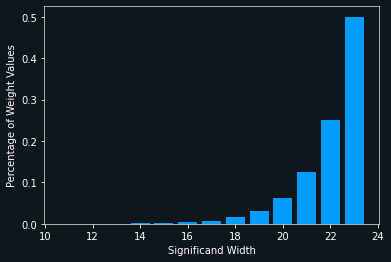

In [11]:
print("MLP2 Weights Significand")

import utils
from collections import defaultdict

lengths = defaultdict(lambda: 0)
total = 0
with open(mlp2_weights_file, 'r') as file:
    weights = file.readlines()
    total = len(weights)
    for value in weights:
        significand = utils.significand_length(float(value))
        lengths[significand] += 1

percentages = {}
for k, v in sorted(lengths.items()):
    if k == 0: continue
    percentages[k] = v / total
    print(k, v, str.format('{:.3f}', v / total))

plt.xlabel('Significand Width')
plt.ylabel('Percentage of Weight Values')
plot_save_histogram("mlp2-weights-significand.png", percentages)

MLP2 Weights Exponent
2 1 0.000
3 294 0.003
4 69826 0.638
5 39105 0.357
6 160 0.001


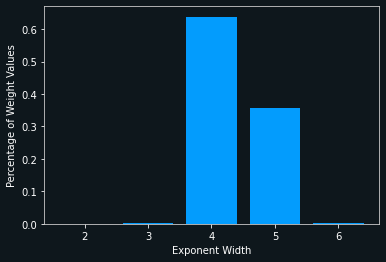

In [12]:
print("MLP2 Weights Exponent")

import utils
from collections import defaultdict

ranges = {i:(utils.exponent_no_subnormal_range(i)) for i in range(2, 9)}
lengths = defaultdict(lambda: 0)
total = 0
with open(mlp2_weights_file, 'r') as file:
    weights = file.readlines()
    for value in weights:
        exponent, _ = utils.components(float(value))
        for width, (minimum, maximum) in ranges.items():
            if exponent >= minimum and exponent <= maximum:
                lengths[width] += 1
                total += 1
                break
    assert(total == len(weights))
    # for k, v in sorted(lengths.items()): 
    #     print(k, v, str.format('{:.3f}', v / total))

percentages = {}
for k, v in sorted(lengths.items()):
    percentages[k] = v / total
    print(k, v, str.format('{:.3f}', v / total))

plt.xlabel('Exponent Width')
plt.ylabel('Percentage of Weight Values')
plot_save_histogram("mlp2-weights-exponent.png", percentages)

CNN2 Weights Significand
11 92 0.000
12 197 0.000
13 419 0.001
14 793 0.001
15 1546 0.002
16 3202 0.004
17 6185 0.008
18 12526 0.016
19 24826 0.031
20 49870 0.063
21 99641 0.125
22 198882 0.250
23 398288 0.500


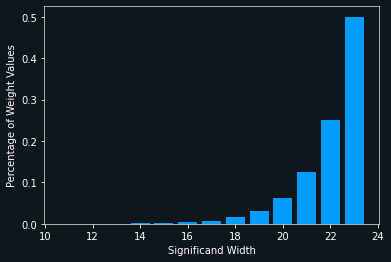

In [13]:
print("CNN2 Weights Significand")

import utils
from collections import defaultdict

lengths = defaultdict(lambda: 0)
total = 0
with open(cnn2_weights_file, 'r') as file:
    weights = file.readlines()
    total = len(weights)
    for value in weights:
        significand = utils.significand_length(float(value))
        lengths[significand] += 1
    # for k, v in sorted(lengths.items()): 
    #     print(k, v, str.format('{:.3f}', v / total))

percentages = {}
for k, v in sorted(lengths.items()):
    if k < 5: continue
    percentages[k] = v / total
    print(k, v, str.format('{:.3f}', v / total))

plt.xlabel('Significand Width')
plt.ylabel('Percentage of Weight Values')
plot_save_histogram("cnn2-weights-significand.png", percentages)


CNN2 Weights Exponent
2 332 0.000
3 164596 0.207
4 505347 0.634
5 125747 0.158
6 492 0.001
2 332 0.000
3 164596 0.207
4 505347 0.634
5 125747 0.158
6 492 0.001


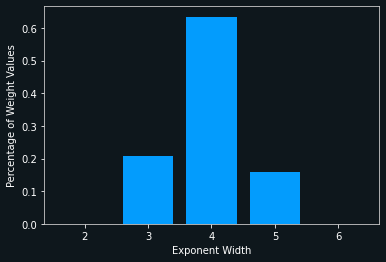

In [14]:
print("CNN2 Weights Exponent")

ranges = {i:(utils.exponent_no_subnormal_range(i)) for i in range(2, 9)}
lengths = defaultdict(lambda: 0)
total = 0
with open(cnn2_weights_file, 'r') as file:
    weights = file.readlines()
    for value in weights:
        exponent, _ = utils.components(float(value))
        for width, (minimum, maximum) in ranges.items():
            if exponent >= minimum and exponent <= maximum:
                lengths[width] += 1
                total += 1
                break
    assert(total == len(weights))
    for k, v in sorted(lengths.items()): 
        print(k, v, str.format('{:.3f}', v / total))

percentages = {}
for k, v in sorted(lengths.items()):
    percentages[k] = v / total
    print(k, v, str.format('{:.3f}', v / total))

plt.xlabel('Exponent Width')
plt.ylabel('Percentage of Weight Values')
plot_save_histogram("cnn2-weights-exponent.png", percentages)

11
range(11, 24)


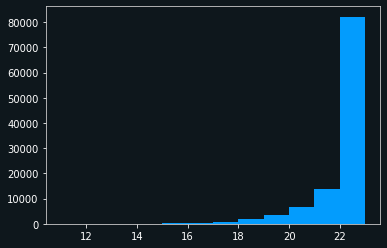

In [15]:
import utils
import matplotlib.pyplot as plt

lengths = []

with open(mlp2_weights_file, 'r') as file:
    weights = file.readlines()
    for value in weights:
        significand = utils.significand_length(float(value))
        lengths.append(significand)

# remove outliers
lengths = list(filter(lambda x: x != 0, lengths))
print(min(lengths))
print(range(min(lengths), max(lengths) + 1))

plt.hist(lengths, bins = range(min(lengths), max(lengths) + 1, 1))
plt.show()

In [16]:
with open(mlp2_weights_file, 'r') as mlp2_file, open(cnn2_weights_file, 'r') as cnn2_file:
    mlp2 = [float(value) for value in mlp2_file.readlines()]
    cnn2 = [float(value) for value in cnn2_file.readlines()]
    print("mlp2 - max: {}, min: {}".format(max(mlp2), min(mlp2)))
    print("cnn2 - max: {}, min: {}".format(max(cnn2), min(cnn2)))

mlp2 - max: 1.007841, min: -0.804064
cnn2 - max: 1.299412, min: -1.743891


MLP2 Weights Exponent Exact Value Test


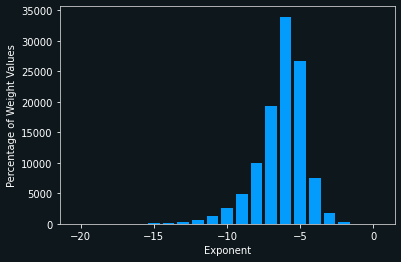

In [17]:
print("MLP2 Weights Exponent Exact Value Test")

import utils
from collections import defaultdict

ranges = {i:(utils.exponent_no_subnormal_range(i)) for i in range(2, 9)}
lengths = defaultdict(lambda: 0)
total = 0
with open(mlp2_weights_file, 'r') as file:
    weights = file.readlines()
    for value in weights:
        exponent, _ = utils.components(float(value))
        total += 1
        lengths[exponent] += 1
    assert(total == len(weights))
    # for k, v in sorted(lengths.items()): 
    #     print(k, v, str.format('{:.3f}', v / total))

kv = lengths
plt.bar(list(kv.keys()), kv.values())
# percentages = {}
# for k, v in sorted(lengths.items()):
#     percentages[k] = v / total
#     print(k, v, str.format('{:.3f}', v / total))

plt.xlabel('Exponent')
plt.ylabel('Percentage of Weight Values')
plt.show()

CNN2 Weights Exponent Exact Value Test


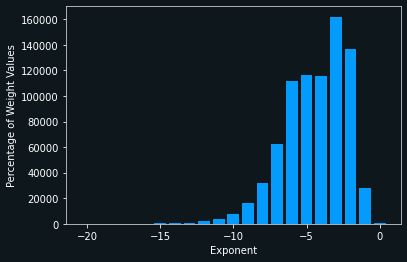

In [18]:
print("CNN2 Weights Exponent Exact Value Test")

import utils
from collections import defaultdict

ranges = {i:(utils.exponent_no_subnormal_range(i)) for i in range(2, 9)}
lengths = defaultdict(lambda: 0)
total = 0
with open(cnn2_weights_file, 'r') as file:
    weights = file.readlines()
    for value in weights:
        exponent, _ = utils.components(float(value))
        total += 1
        lengths[exponent] += 1
    assert(total == len(weights))
    # for k, v in sorted(lengths.items()): 
    #     print(k, v, str.format('{:.3f}', v / total))

kv = lengths
plt.bar(list(kv.keys()), kv.values())
# percentages = {}
# for k, v in sorted(lengths.items()):
#     percentages[k] = v / total
#     print(k, v, str.format('{:.3f}', v / total))

plt.xlabel('Exponent')
plt.ylabel('Percentage of Weight Values')
plt.show()